# **Treadmill Buyer Profilling In Python**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data Science_Shubham/Machine learning datasets/GS_Capstone/Aerofit Treadmill Buyer/aerofit_treadmill_data.csv")

In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data.shape

(180, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The DataFrame has columns containing the datatype object. Since each such column only includes a set of predetermined labels, we can convert the datatype to category.

In [ ]:
data['Product']= data['Product'].astype('category')
data['Gender']= data['Gender'].astype('category')
data['MaritalStatus']= data['MaritalStatus'].astype('category')

Firstly we'll look how many people have each of the products using the value count function.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [ ]:
data.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [ ]:
data.describe(include="all")
# Here we use include="all" which gives us all columns. By default only numerical valued columns are presented.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


*  We have 3 unique products in our dataset.
*  Here we can see KP281 is most used product by our customers.


*   Out of 180 data points 104 of them are Male and rest Female.



*   Also Partnered people are m and rest single.ore likely to use the treadmil. 107 of customers are partnered






*   The age group of the customer ranges between 18 and 50 years old. Mean age is 28.79

*   Here we can see that on an average treadmills are used about 3.45 days a week.


*   Standard deviation for `Income` & `Miles` is very high. These variables might have outliers in them.




In [ ]:
# Missing Values detection

data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No missing values found in the dataset.




In [ ]:
# Checking duplicate values in the dataset

data.duplicated().value_counts()

False    180
dtype: int64

No data duplicates were found during analysis

# Non Graphical Analysis

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
data['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [ ]:
data['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

This shows that maximum of the customers have rated them 3 stars based on their fitness level.

#Graphical Analysis

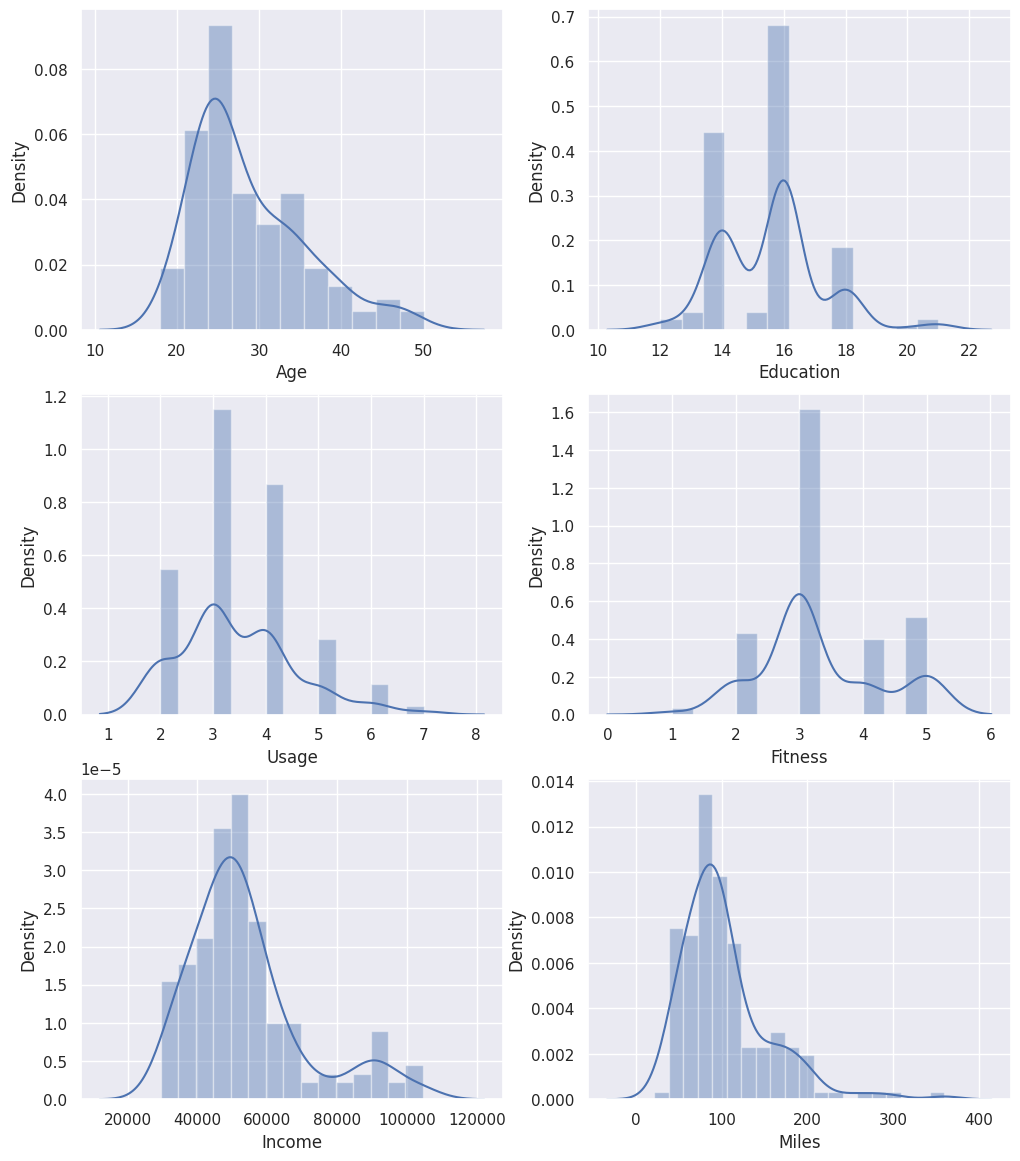

In [ ]:
fig, axis= plt.subplots(nrows=3,ncols=2, figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.distplot(data['Age'], kde=True, ax= axis[0,0])
sns.distplot(data['Education'], kde=True, ax=axis[0,1])
sns.distplot(data['Usage'], kde=True, ax=axis[1,0])
sns.distplot(data['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(data['Income'], kde=True, ax=axis[2,0])
sns.distplot(data['Miles'], kde=True, ax=axis[2,1])


plt.show()


# Observations

Both Miles and Income have significant outliers based on the above distribution.

Also Miles and Income are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

Customer with fitness level 3 buy a major chuck of treadmills.

Majority of Customers fall within the $ 45,000 - $ 60,000 income range

Now lets plot count plot in a similar manner.

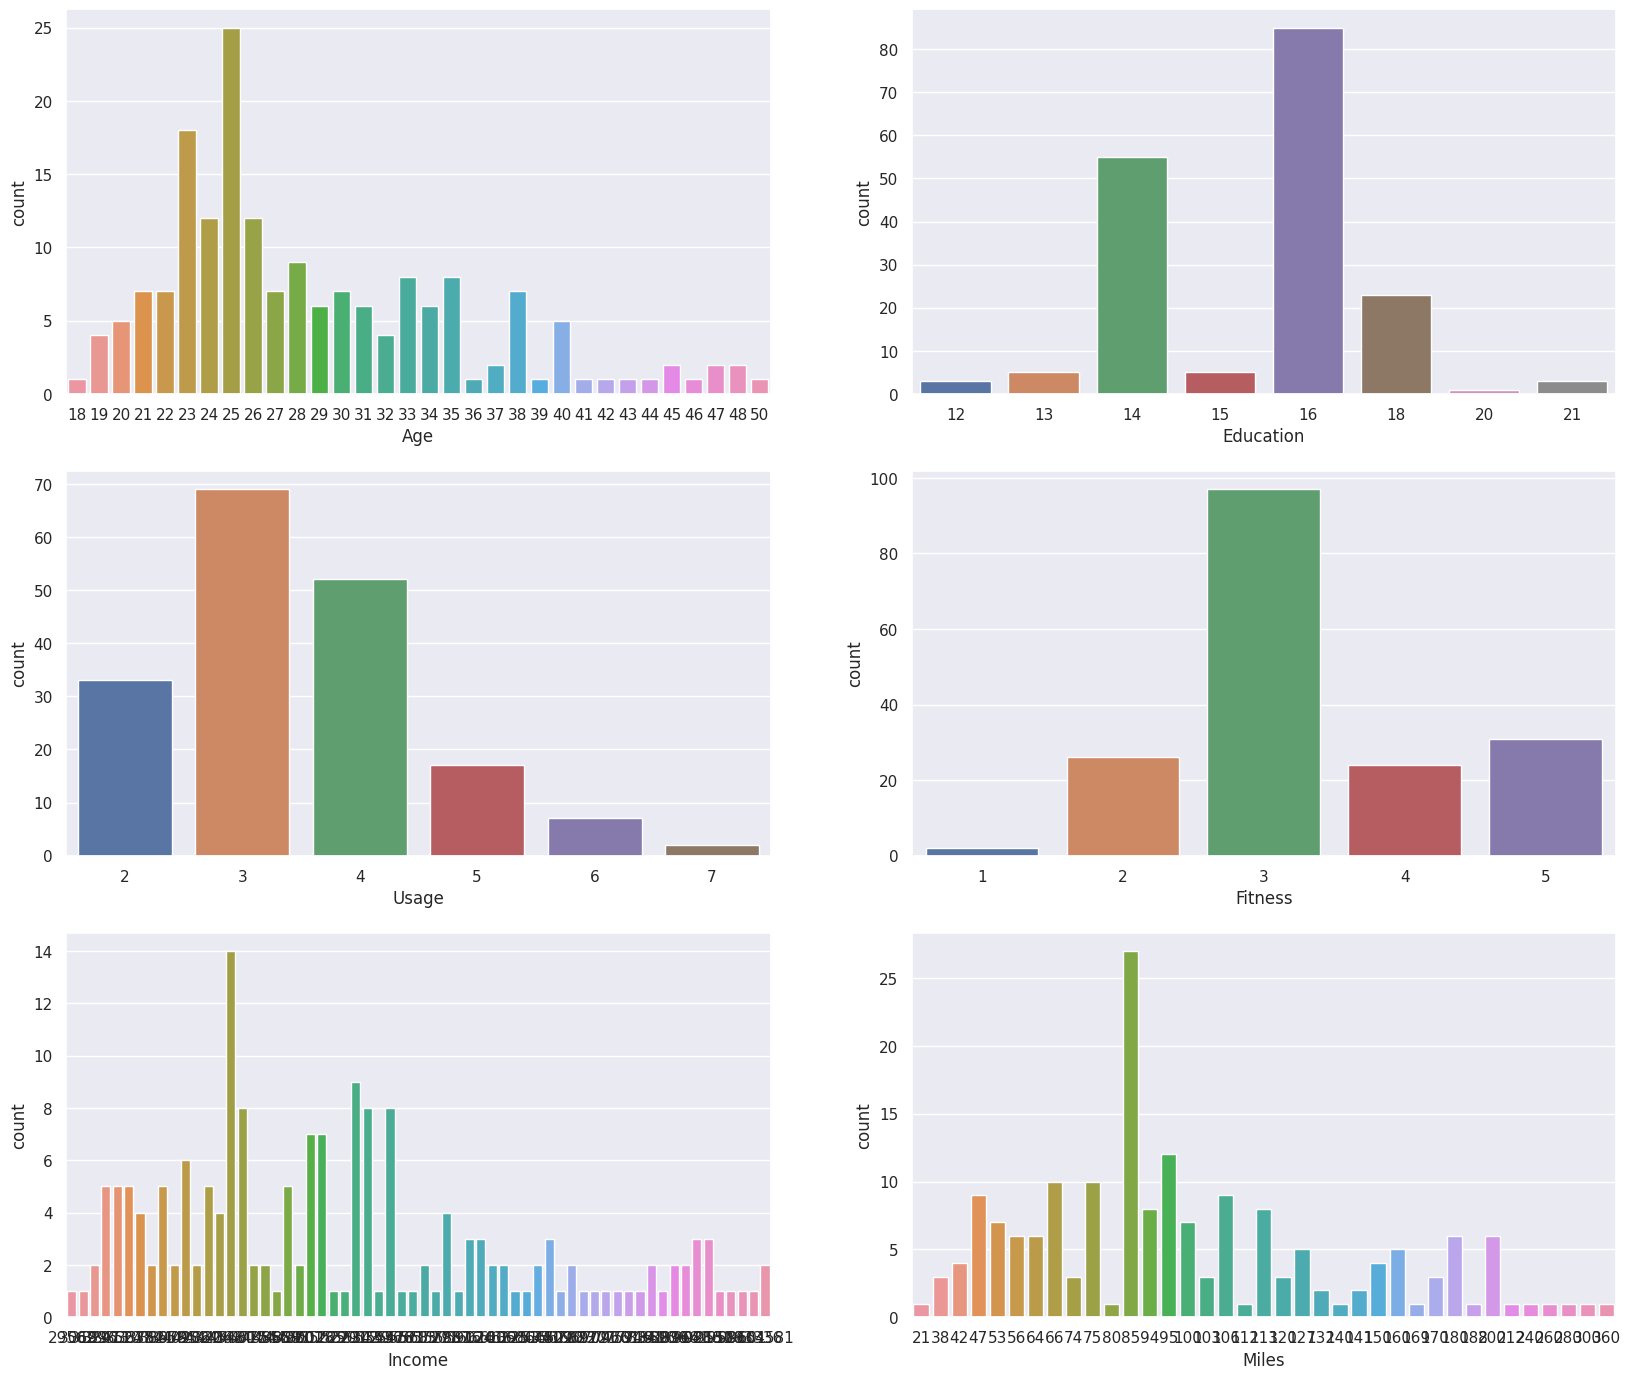

In [ ]:
fig, axis=plt.subplots(nrows=3, ncols=2, figsize=(20,12))
fig.subplots_adjust(top=1.2)



sns.countplot(data=data, x='Age', ax=axis[0,0])
sns.countplot(data=data, x='Education', ax=axis[0,1])
sns.countplot(data=data, x='Usage', ax=axis[1,0])
sns.countplot(data=data, x='Fitness', ax=axis[1,1])
sns.countplot(data=data, x='Income', ax=axis[2,0])
sns.countplot(data=data, x='Miles', ax=axis[2,1])

plt.show()



# Observations

People at age around 25 are more likely to workout compared to old people.

<Axes: xlabel='Miles'>

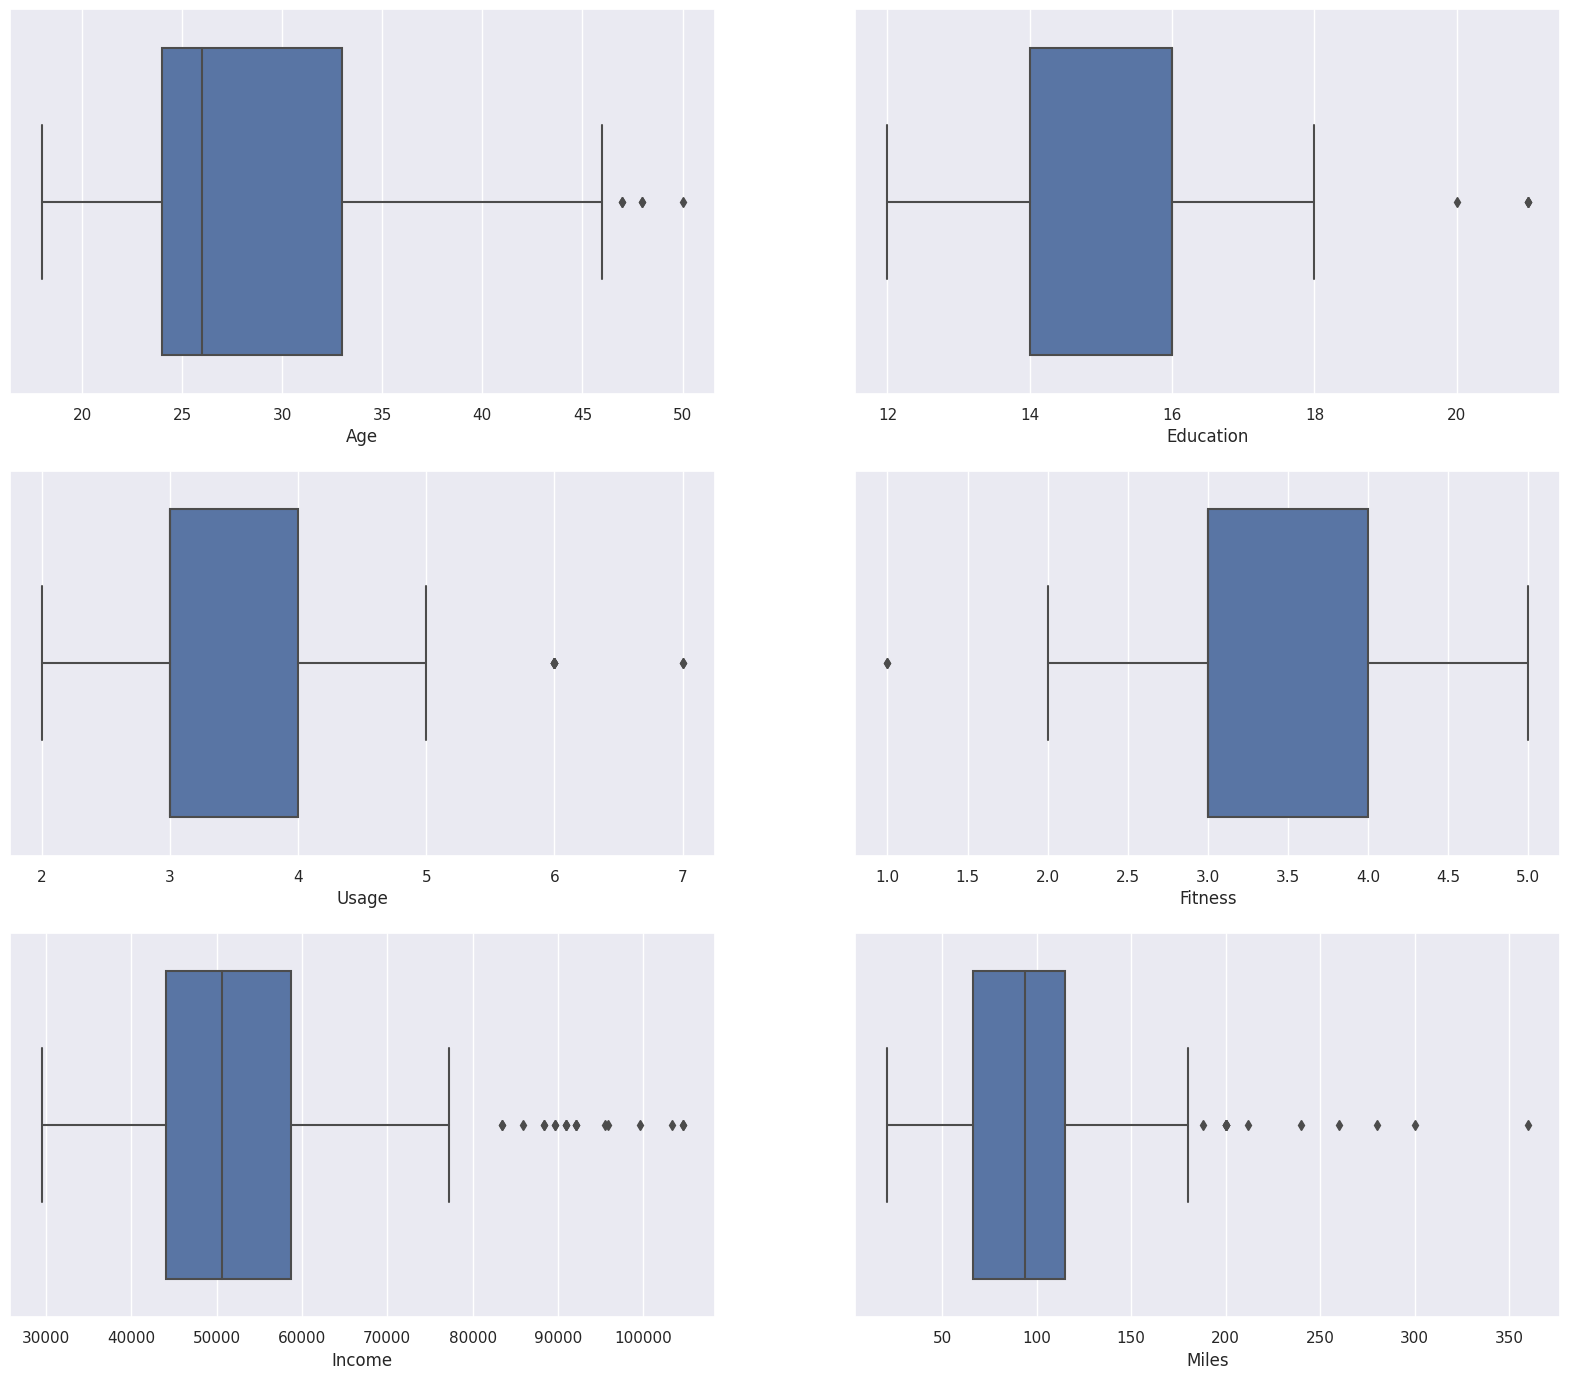

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20,12))
fig.subplots_adjust(top=1.2)


sns.boxplot(data=data, x= "Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x= "Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x= "Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x= "Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x= "Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x= "Miles", orient='h', ax=axis[2,1])








# Observations:
Age, Education, Fitness and Usage have few outliers while Income and Miles have more outliers.

Text(0.5, 1.0, 'MaritalStatus-Counts')

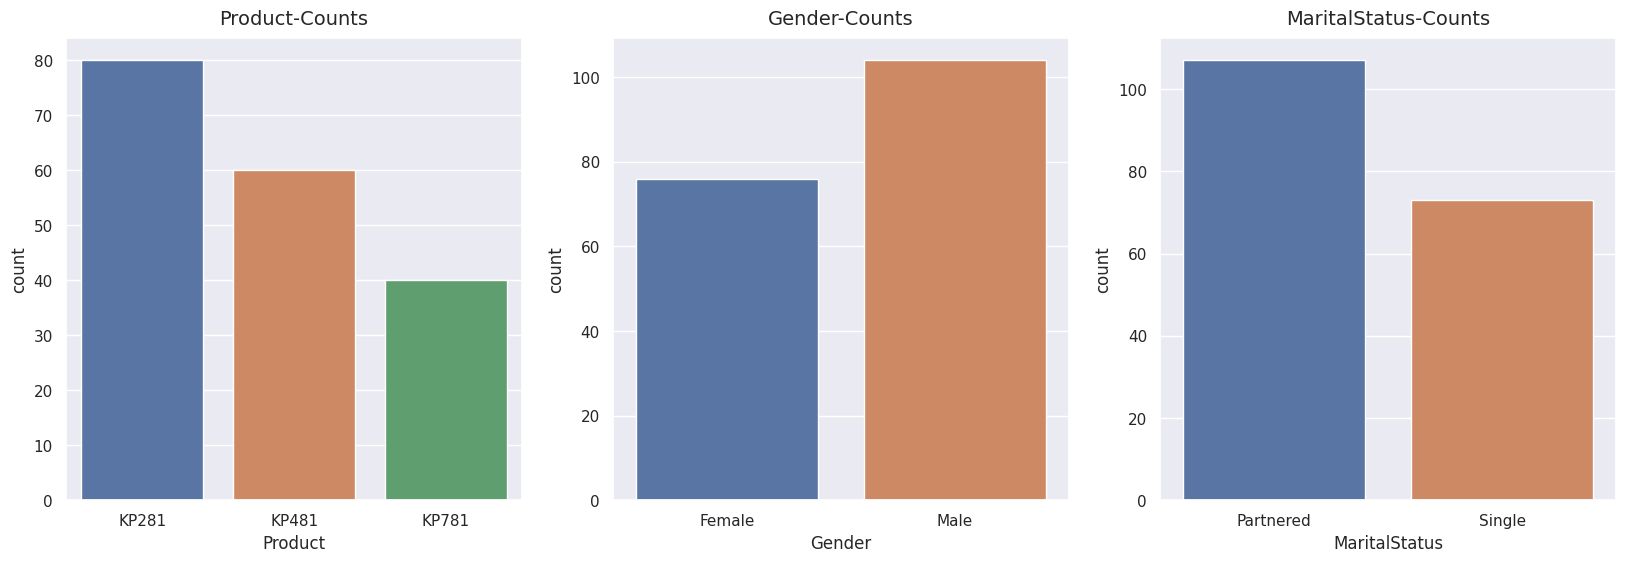

In [ ]:
fig, axis= plt.subplots(nrows=1, ncols=3, figsize=(20,6))

sns.countplot(data=data, x="Product", ax=axis[0])
sns.countplot(data=data,x='Gender', ax=axis[1])
sns.countplot(data=data, x="MaritalStatus", ax=axis[2])


axis[0].set_title("Product-Counts",  pad=10, fontsize=14)
axis[1].set_title("Gender-Counts",  pad=10, fontsize=14)
axis[2].set_title("MaritalStatus-Counts",  pad=10, fontsize=14)


# Observations:

Product Kp281 is the most frequent product. Males are more likely to use treadmills than females and partnered people use treadmill more often than singles.

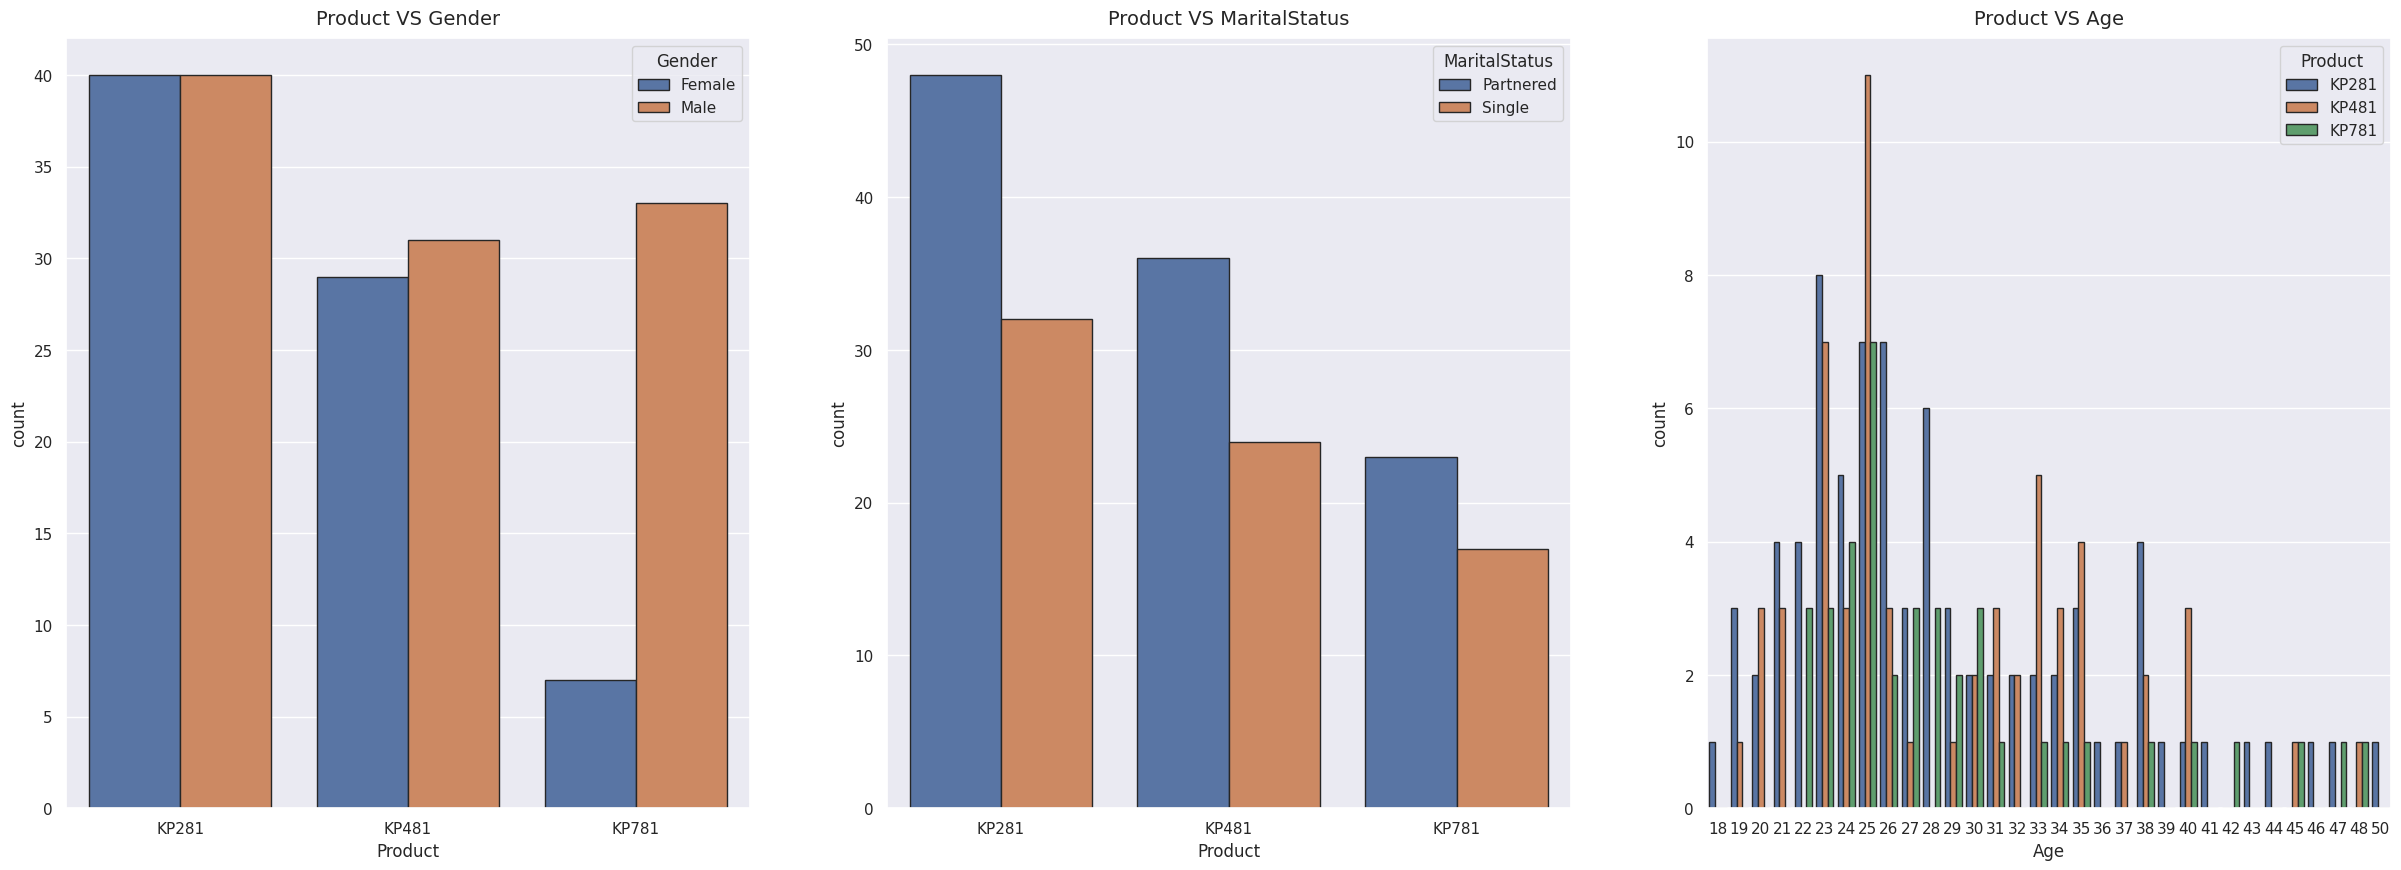

In [ ]:
fig, axis= plt.subplots(nrows=1, ncols=3,figsize=(30,10))


sns.countplot(data=data, x='Product', hue='Gender',edgecolor="0.15", ax=axis[0])

sns.countplot(data=data, x='Product', hue= 'MaritalStatus', edgecolor="0.15", ax=axis[1])

sns.countplot(data=data, x='Age', hue='Product' ,edgecolor="0.15", ax=axis[2])


axis[0].set_title("Product VS Gender", pad=10, fontsize=14)
axis[1].set_title("Product VS MaritalStatus", pad=10, fontsize=14)
axis[2].set_title("Product VS Age", pad=10, fontsize=14)


plt.show()





# Obervations

Product vs Gender

Equal number of males and females have purchased KP281 product and Almost same for the product KP481

Most of the Male customers have purchased the KP781 product.

Product vs MaritalStatus

Customer who is Partnered, is more likely to purchase the product.
Age vs Product

Customers with age of 25 are more likely to purchase the KP481 product.

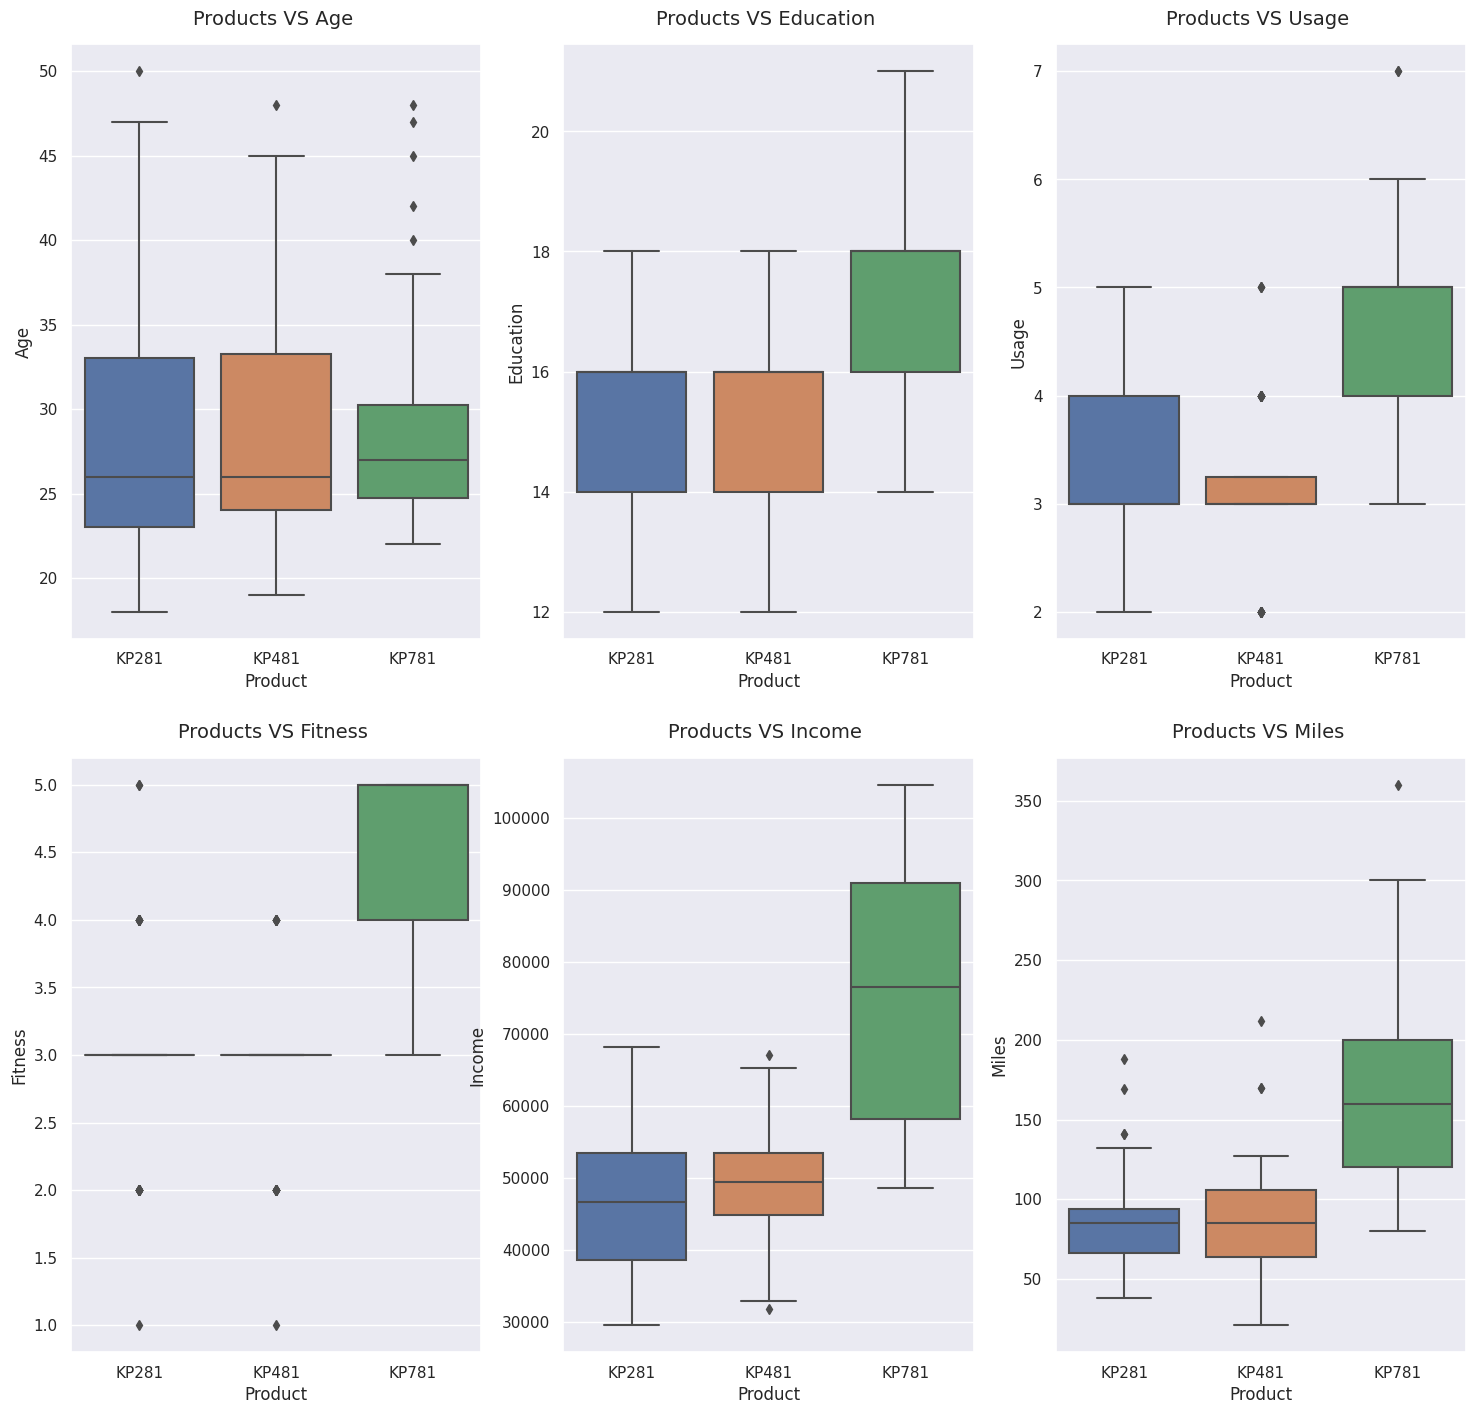

In [ ]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
count=0


fig, axis= plt.subplots( nrows=2, ncols=3, figsize=(18,12))
fig.subplots_adjust(top=1.2)
for i in range(2):
  for j in range(3):
    sns.boxplot(data=data, x='Product', y=attributes[count], ax=axis[i,j])
    axis[i,j].set_title(f"Products VS {attributes[count]} ", pad=14, fontsize=14)
    count+=1







**Observations:**

**Product vs Age**
* Customers purchasing products KP281 & KP481 are having same Age median value.
* Customers whose age lies between 25-30, are more likely to buy the KP781 product

**Product vs Education**
* Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
* While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

**Product vs Usage**
* Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
* While the other customers are likely to purchase KP281 or KP481.

**Product vs Fitness**
* The more the customer is fit (fitness >= 3), the higher the chances of the customer purchasing the KP781 product.

**Product vs Income**
* The higher the Income of the customer (Income >= 60000), the higher the chances of the customer purchasing the KP781 product.

**Product vs Miles**
* If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.

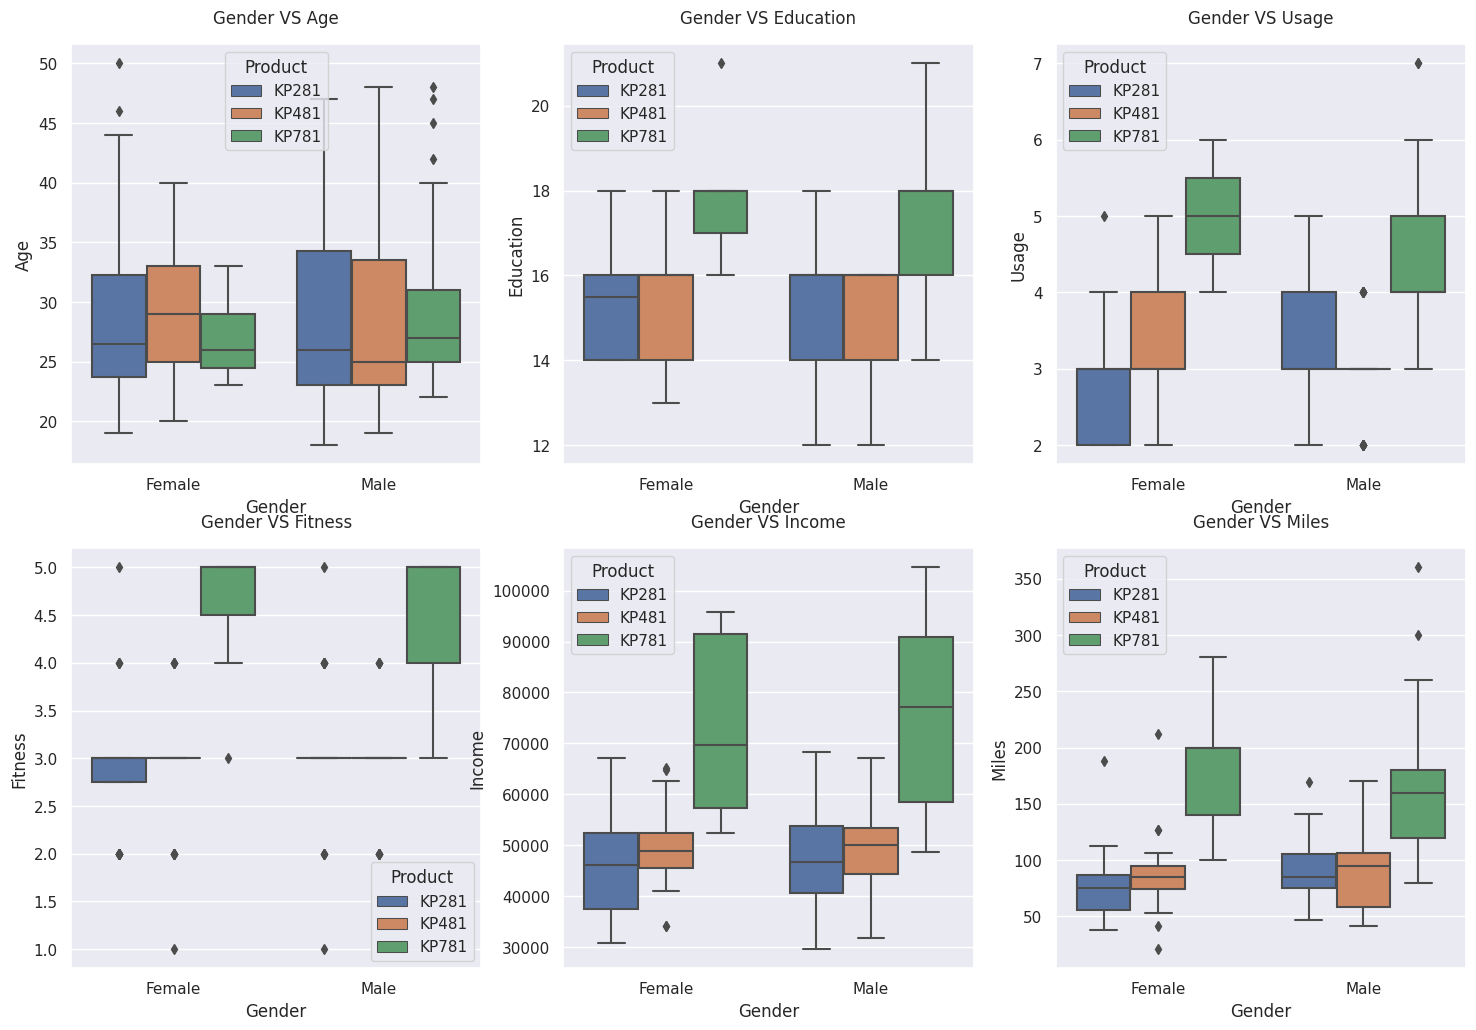

In [ ]:
attrib=['Age', 'Education', 'Usage', 'Fitness','Income', 'Miles']
count=0

figure, axis= plt.subplots(nrows=2, ncols=3, figsize=(18,12))
fig.subplots_adjust(top=1.3)
for i in range(2):
  for j in range(3):

    sns.boxplot(data=data, x='Gender', y=attrib[count], hue='Product', ax=axis[i,j])
    axis[i,j].set_title(f"Gender VS {attrib[count]}", pad=15)
    count+=1






# Correlation Analysis

In [ ]:
#This gives us the covariance matrix
data.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [ ]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


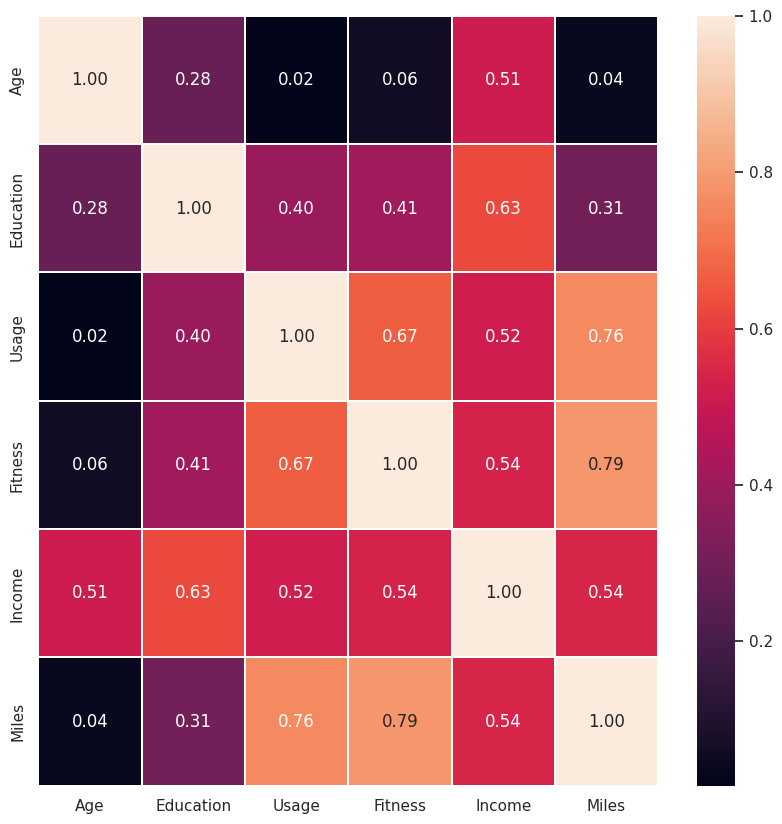

In [ ]:
figure, axis=plt.subplots(figsize=(10,10))
sns.set(color_codes = True)
sns.heatmap(data=data.corr(), annot=True, linewidths=0.05,fmt ='0.2f')
plt.show()

**Observations:**

(`Miles` & `Fitness`) and (`Miles` & `Usage`) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.

`Income` and `Education` shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is having advanced features.

There is no correlation between (`Usage` & `Age`) or (`Fitness` & `Age`) attributes, which mean Age should not be a barrier to using treadmills or specific model of treadmills.

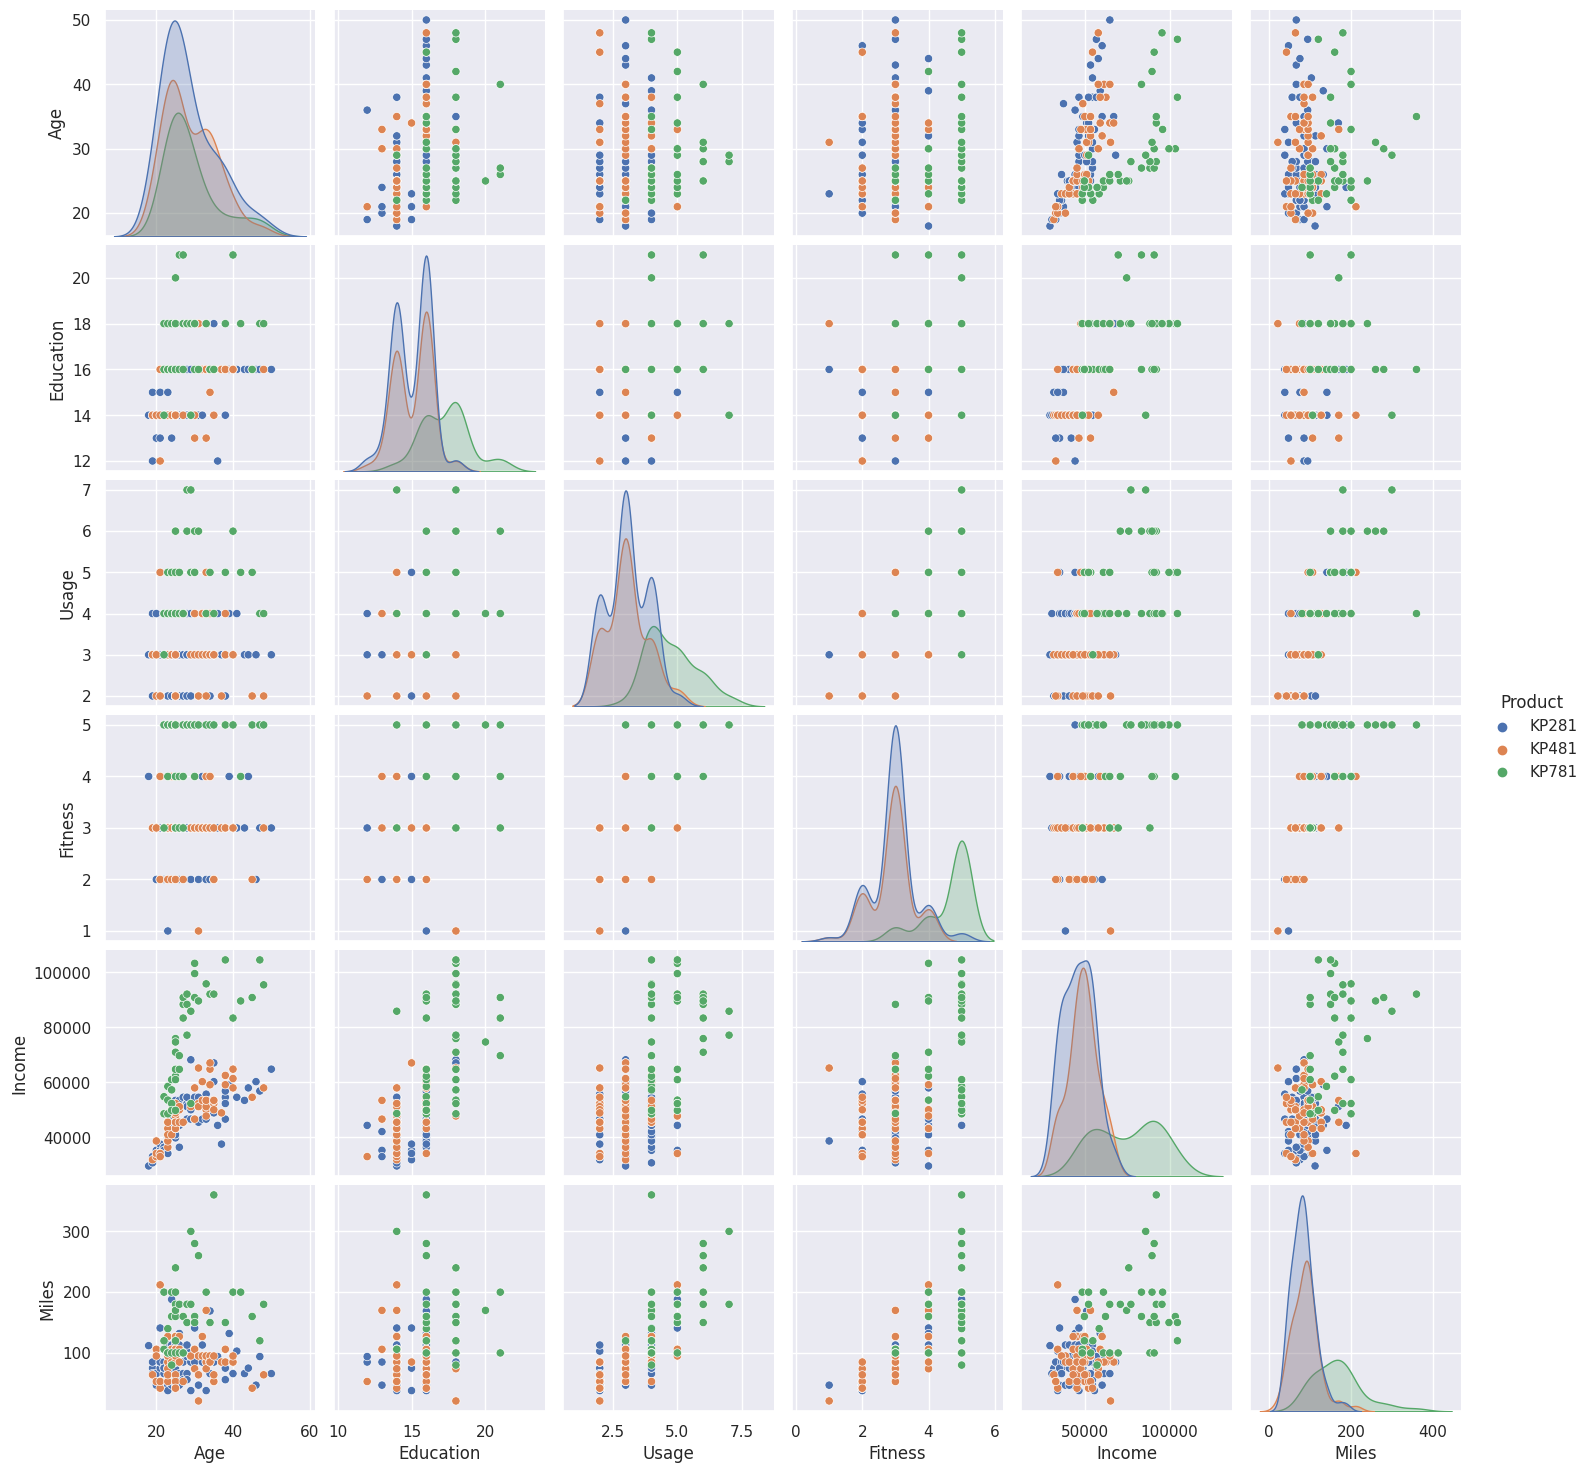

In [ ]:
sns.pairplot(data=data, hue='Product')

# Marginal and Conditional Probabilities

What percent of customers have purchased KP281, KP481, or KP781?

In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data1


,variable,value
0,Product,KP281
1,Product,KP281
2,Product,KP281
3,Product,KP281
4,Product,KP281
...,...,...
535,MaritalStatus,Single
536,MaritalStatus,Single
537,MaritalStatus,Single
538,MaritalStatus,Partnered


In [ ]:
data1 = data[["Product", "Gender", "MaritalStatus"]].melt()
(data1.groupby(['variable', 'value'])[['value']].count()/len(data) *100).round(3).astype(str) +"%"

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

In [ ]:
data1= pd.crosstab(index=data['Gender'], columns= data['Product'])
data1

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
p_281= data1['KP281']['Male']

p_281

40

In [ ]:
data1['KP281']['Male']

40

In [ ]:
data1['KP281'][gender]/data1['KP281']

In [ ]:
data1.loc['Male']

Product
KP281    40
KP481    31
KP781    33
Name: Male, dtype: int64

In [ ]:
40/104

0.38461538461538464

**Observations**

**Product**
* 44.44% of the customers have purchased KP281 product.
* 33.33% of the customers have purchased KP481 product.
* 22.22% of the customers have purchased KP781 product.

**Gender**
* 57.78% of the customers are Male.

**MaritalStatus**
* 59.44% of the customers are Partnered.

# What is the probability of a customer based on gender buying a certain treadmill Product?


In [ ]:
def prob_prod_given_gender(gender, print_marginal=False):
  if gender is not  "Female" and gender is not "Male":
        return "invalid gender value."


  data1= pd.crosstab(index=data['Gender'], columns= data['Product'])
  p_281= data1['KP281'][gender] / data1.loc[gender].sum()
  p_481= data1['KP481'][gender] / data1.loc[gender].sum()
  p_781= data1['KP781'][gender] / data1.loc[gender].sum()


  if print_marginal:
      print(f"P(Male): {data1.loc['Male'].sum()/len(data):.2f}")

      print(f"P(Female): {data1.loc['Female'].sum()/len(data):.2f}\n")




  print(f"P(KP281/{gender}): {p_281:.2f} ")
  print(f"P(KP481/{gender}): {p_481:.2f} ")
  print(f"P(K781/{gender}): {p_781:.2f} \n")


prob_prod_given_gender("Male", True)
prob_prod_given_gender("Female")


P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38 
P(KP481/Male): 0.30 
P(K781/Male): 0.32 

P(KP281/Female): 0.53 
P(KP481/Female): 0.38 
P(K781/Female): 0.09 



**What is the probability of a customer based on `MaritalStatus` ( Single or Partnered ) buying a certain treadmill `Product`?**

In [ ]:
def prob_prod_given_mstatus(status, print_marginal=False):
  if status is not "Single" and status is not "Partnered":
    return "invalid marital status"


  data2=pd.crosstab(index=data['MaritalStatus'], columns=data['Product'])
  p_281 = data2['KP281'][status]/ data2.loc[status].sum()

  p_481= data2['KP481'][status]/ data2.loc[status].sum()

  p_781= data2['KP781'][status]/ data2.loc[status].sum()

  if print_marginal:

    print(f"P(Single): {data2.loc['Single'].sum()/len(data):.2f}")
    print(f"P(Partnered): {data2.loc['Partnered'].sum()/len(data):.2f}\n")


  print(f"P(KP281/{status}): {p_281:.2f}")
  print(f"P(KP481/{status}): {p_481:.2f}")
  print(f"P(KP781/{status}): {p_781:.2f}\n")

prob_prod_given_mstatus('Single', True)
prob_prod_given_mstatus('Partnered')




P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



# Product-Gender

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
prod_gen=pd.crosstab(index= data['Product'], columns=data['Gender'], margins=True)
prod_gen

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Here we set margins=True which gives us the sum of rows on the right as a new column "All"

In [ ]:
# Percentage of a Male customer purchasing a treadmill

p_male=round(prod_gen["Male"]["All"]/prod_gen["All"]['All'],2)
p_male= round(p_male*100,2)
p_male


58.0

In [ ]:
# Percentage of a Female customer purchasing KP781 treadmill

p_female= round(prod_gen['Female']["KP781"]/ prod_gen["All"]["All"],2)
p_female=round(p_female*100,2)
p_female


4.0

In [ ]:
# Probability of a customer being a Female given that Product is KP281
#P(A|B) = P(A,B)/P(B) - Bayes' Theorem
#P(Female|KP281) = P(Female,KP281)/P(KP281)


prob= round(prod_gen['Female']['KP281'] /prod_gen["All"]["KP281"] ,2)
prob = round(prob*100,2)
prob


50.0

**Observations:**

* Female customer prefer to buy KP281 & KP481
* 50% of female tend to purchase treadmill model KP281

# Product-Age

In [ ]:
prod_age = data.copy()
prod_age.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Extracting 2 new features from Age:
# "AgeCategory" - Teens, 20s, 30s and Above 40s
# "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60
bins=[14,20,30,40,60]
labels=["Teens", "20s", "30s", "Above 40s"]

prod_age['AgeGroup'] = pd.cut(prod_age['Age'], bins)
prod_age['AgeCategory'] =pd.cut(prod_age['Age'], bins, labels=labels)
# prod_age['AgeCategory']

prod_age.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


Now creating a crosstab by setting product as index and agecategory as columns

In [ ]:
prod_age_tab=pd.crosstab(index=prod_age['Product'], columns=prod_age['AgeCategory'], margins=True)
prod_age_tab

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [ ]:
# Percentage of customers with Age between 20s and 30s among all customers


pct = round(prod_age_tab['20s']['All'].sum()/ prod_age_tab['All']['All'],2)

pct= round(pct*100,2)
pct

61.0

**Observations:**

* Teens don't prefer to buy KP781
* 61% of customers are between 20 and 30 years old

# Product-Income

In [ ]:
prod_income=data.copy()

In [ ]:
# Extracting 1 new categorial feature based on the Income:
# "IncomeCategory" - Low Income, Lower-middle Income, Upper-Middle Income and High Income

bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']

prod_income['IncomeCategory']= pd.cut(data['Income'], bins_income, labels=labels_income)
prod_income.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle Income


In [ ]:
prod_income_tab=pd.crosstab(index=prod_income['Product'], columns=prod_income['IncomeCategory'], margins=True)

prod_income_tab

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [ ]:
# Percentage of a low-income customer purchasing a treadmill

pct = round(prod_income_tab["Low Income"]["All"]/prod_income_tab["All"]["All"],2)

pct=round(pct*100,2)

pct

8.0

In [ ]:
# Percentage of a high-income customer purchasing KP781 treadmill

pct = round(prod_income_tab["High Income"]["KP781"]/prod_income_tab["All"]["All"],2)

pct=round(pct*100,2)

pct

9.0

In [ ]:
# Percentage of customer with high-income salary buying treadmill given that Product is KP781

pct = round(prod_income_tab["High Income"]["KP781"]/prod_income_tab["All"]["KP781"],2)

pct=round(pct*100,2)

pct

42.0

# Product-Fitness

In [ ]:
prod_fit= pd.crosstab(index=data['Product'], columns=data['Fitness'], margins=True)
prod_fit

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [ ]:
# Percentage of a customers having fitness level 5


pct= round(prod_fit[5]["All"]/prod_fit["All"]["All"],2)

pct= round(pct*100,2)
pct

17.0

In [ ]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill

pct= round(prod_fit[5]['KP781']/prod_fit["All"]["All"],2)

pct=round(pct*100,2)
pct

16.0

In [ ]:
# Percentage of customer with fitness level 5 buying KP781 treadmill given that Product is KP781
#P(customer fit5, KP781/KP781)

pct = round((prod_fit[5]['KP781']/prod_fit['All']['KP781']),2)
pct=round(pct*100,2)
pct

72.0

# Product-Marital Status

In [ ]:
prod_mstat = pd.crosstab(index=data["Product"], columns=data["MaritalStatus"], margins=True)
prod_mstat

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
# Percentage of a customers who are partnered using treadmills

pct= round(prod_mstat["Partnered"]["All"]/ prod_mstat["All"]["All"],2)
pct = round(pct*100,2)
pct


59.0

# Outlier Detection

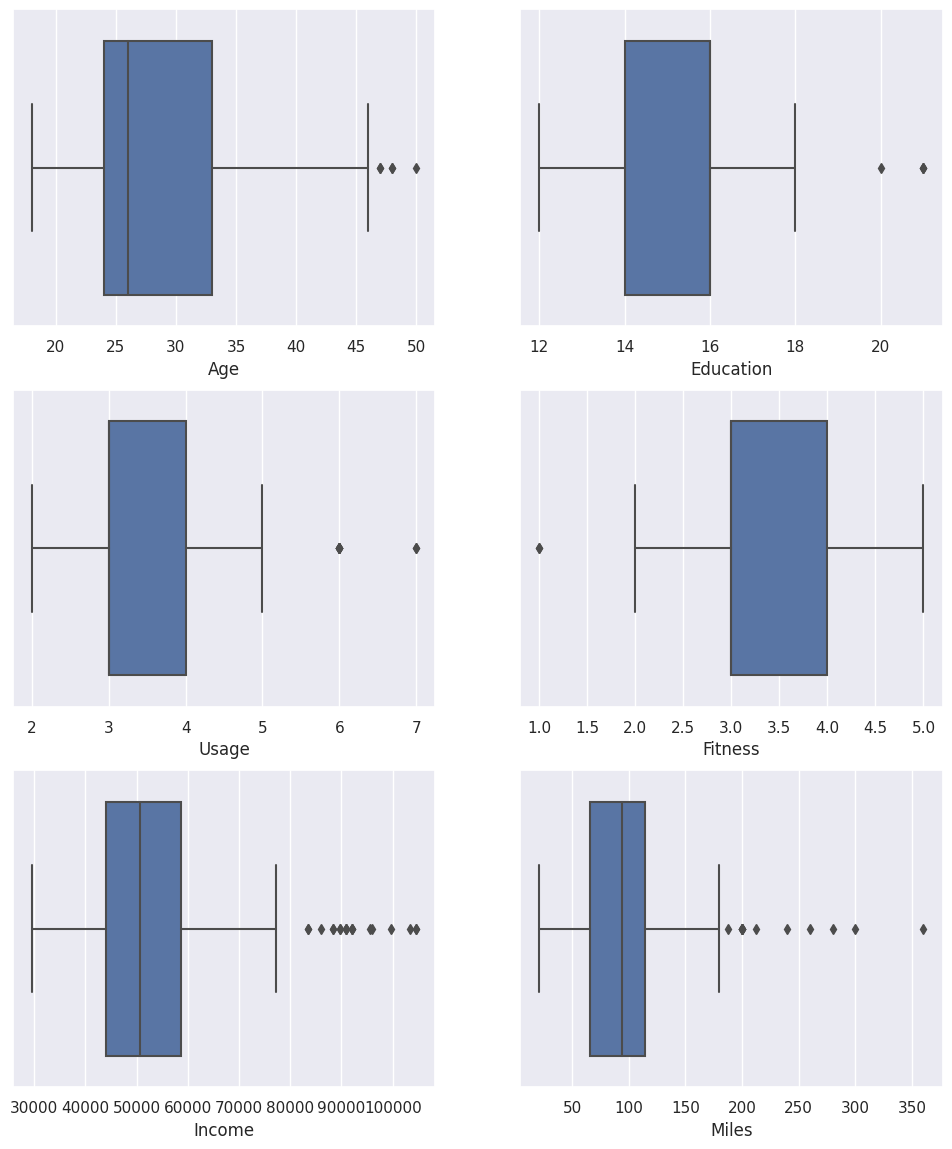

In [ ]:
figure, axis =plt.subplots(nrows=3, ncols=2, figsize=(12,14))

fig.subplots_adjust(top=1.5)


sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education",orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage",orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness",orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income",orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles",orient='h', ax=axis[2,1])


plt.show()




# Observation

*   Income and Miles have more outliers compared to Usage, Education and age.




# Outlier Handling for Income Feature

In [ ]:
data_copy= data.copy()


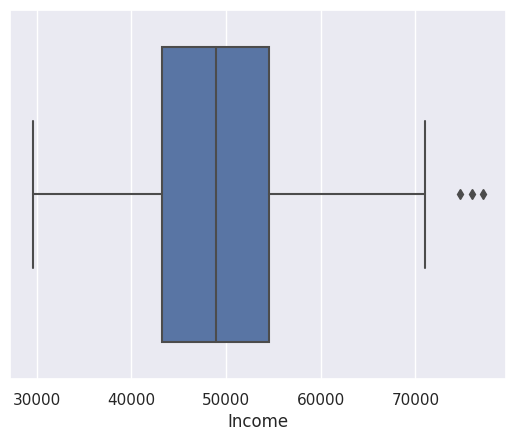

In [ ]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = data['Income'].quantile(0.75)
Q1 = data['Income'].quantile(0.25)
IQR = Q3-Q1
data_copy = data_copy[(data_copy['Income'] > Q1 - 1.5*IQR) & (data_copy['Income'] < Q3 + 1.5*IQR)]

sns.boxplot(data=data_copy, x="Income", orient='h')
plt.show()

# Outlier Handling for Miles Feature

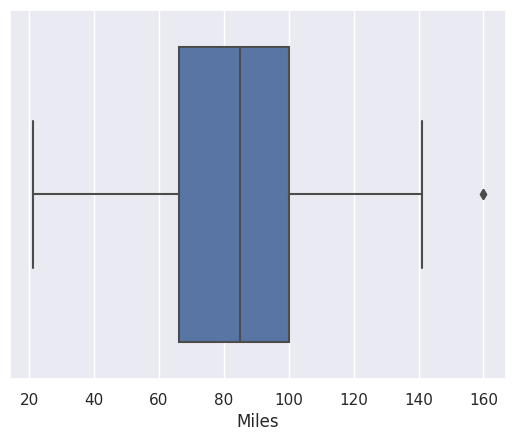

In [ ]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = data_copy['Miles'].quantile(0.75)
Q1 = data_copy['Miles'].quantile(0.25)
IQR = Q3-Q1
data_copy = data_copy[(data_copy['Miles'] > Q1 - 1.5*IQR) & (data_copy['Miles'] < Q3 + 1.5*IQR)]

sns.boxplot(data=data_copy, x="Miles", orient='h')
plt.show()

In [ ]:
#Before removing Outliers
data.shape

NameError: ignored

In [ ]:
#After removing Outliers
data_copy.shape

(147, 9)

While there are outliers, they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

# **Actionable Insights & Recommendations**

# Actionable Insights:




*   The item with the most sales is model KP281. KP281 represents 44.0% of all treadmill sales.
*   
The bulk of treadmill users had an annual income between $45,000 and $80,000.
Individuals with incomes between $ 35,000 and $ 85,000 purchase 83% of treadmills.

*   Only 8% of consumers with earnings under $35,000 purchase treadmills.

* Customers between the ages of 20 and 40 buy 88% of treadmills.
*  
Due to the strong correlation between miles and both fitness and usage, customers who are fit tend to use treadmills more frequently.


*  
The only model bought by a customer with more than 20 years of schooling and an annual income of more than $85,000 is KP781.


*   With Fitness level 4 and 5, the customers tend to use high-end treadmills and the average number of miles is above 150 per week.



# Recommendations:




*  With customers earning between $45,000  and $60,000, the KP281 and KP481 are popular models that these companies may sell as reasonably priced models.





*   Marketing KP781 as a Premium Model and targeting market segments with an average age of over 20 years and high income levels may increase sales.

*  Given that the KP781 is a premium model, it is best suited for active individuals with high weekly miles who can also afford to buy it.

*  To increase its customer base, Aerofit should carry out market research to see whether it can draw clients who earn less than $35,000.














